<a href="https://colab.research.google.com/github/jessika2018/Data-analysis-Master---ashrafieh-sales/blob/main/Copy_data_analysis_achrafieh_sales-v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on Spinneys - Ashrafieh Sales

Spinneys is a popular retailer company that people buy across the word its product. In this EDA (Exploratary data Analysis), I will explore the top 10 products sold the most  on X months and the top 10 product sold the least on x. I will show the dataset in a graphs using matplotlib and seaborn. Consequently we will take desicions by the end of the analysis. 
The hypothesis suggested is:
 create new compagin including the most frequent itemset purchased along one itemset that purchsed the least.



# Package install and Import
First we will install and import necessary packages

In [211]:
!pip install jovian --upgrade --quiet

In [212]:
pip install seaborn

In [215]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os 

# Loading the dataset  
Now we are ready to load the data set. We will do this using the standard read_excel command from Pandas. Let's take a glimnpse at how the data looks like 


In [216]:
spinneys_dataset_df = pd.read_excel('/content/jessica_data/Ashrafieh_Sales_modified.xlsx')
spinneys_dataset_df.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
0,2019,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
4,2019,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036


In [217]:
%%time
print("Dataframe size",spinneys_dataset_df.shape)

Dataframe size (278545, 14)
CPU times: user 617 µs, sys: 0 ns, total: 617 µs
Wall time: 542 µs


In [219]:
spinneys_dataset_df.groupby(by=["Month"], dropna=False).sum()

,Year,Item Number,SKU,Quantity,Sales Value $
Month,,,,,
Aug,218869695,34178837966,4.752283e+08,186348.260,340426.795264
Jul,189531606,29487043002,3.693037e+08,158502.897,290760.055350
Oct,46283556,7248602764,9.230870e+07,38147.392,72251.569466
Sep,107697498,16832061242,2.078299e+08,91182.341,164394.865897




```
# This is formatted as code
```

# Data Preparation and Cleaning

In [220]:
spinneys_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278545 entries, 0 to 278544
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              278545 non-null  int64  
 1   Month             278545 non-null  object 
 2   Store Name        278545 non-null  object 
 3   Receipt Number    278545 non-null  object 
 4   Category          278545 non-null  object 
 5   Group             278545 non-null  object 
 6   Sub Group         278545 non-null  object 
 7   Item Number       278545 non-null  int64  
 8   Item Family       278509 non-null  object 
 9   Item Description  278545 non-null  object 
 10  Product Size      278520 non-null  object 
 11  SKU               278545 non-null  float64
 12  Quantity          278545 non-null  float64
 13  Sales Value $     278545 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 29.8+ MB


In [221]:
spinneys_dataset_df.nunique()

Year                    1
Month                   4
Store Name              3
Receipt Number      67376
Category               10
Group                  99
Sub Group             523
Item Number         11570
Item Family          1236
Item Description    10567
Product Size         1490
SKU                   578
Quantity              348
Sales Value $        2173
dtype: int64

# Handling Null Values
we can see that for each of the column, there are alot different uniques values for some of them. It makes sense that Receipt Number is large since it is a unique key used to identify transaction. Item Number , Item Family, Item Description, Product Size, Sales Value $, Price and Sales volume contain many unbiques value

In [222]:
spinneys_dataset_df.isnull().values.any()

True

In [223]:
spinneys_dataset_df.isnull().sum().sum()

61

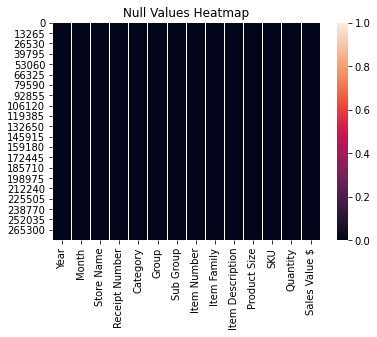

In [224]:
sns.heatmap(spinneys_dataset_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [225]:
spinneys_dataset_df.isnull().sum()

Year                 0
Month                0
Store Name           0
Receipt Number       0
Category             0
Group                0
Sub Group            0
Item Number          0
Item Family         36
Item Description     0
Product Size        25
SKU                  0
Quantity             0
Sales Value $        0
dtype: int64

Above in the heatmap and table, we can see that there are quite few null values in the dataset.There are a total of 61 null value across the entire dataset with 36 missing point under 'Item Family' and 25 under 'Product Size'.
We will have to handle all null data points values before we can dive into EDA and modeling 

In [226]:
spinneys_dataset_df.dropna(subset=['Product Size','Item Family'], inplace=True)

In [227]:
spinneys_dataset_df.isnull().any()

Year                False
Month               False
Store Name          False
Receipt Number      False
Category            False
Group               False
Sub Group           False
Item Number         False
Item Family         False
Item Description    False
Product Size        False
SKU                 False
Quantity            False
Sales Value $       False
dtype: bool

For null values, since the Item family and Product size contains an insignificant portion of data so i will drop them from the dataset. After t, we can see that there are no more null values in the dataset.

# Splitting the dataset
Since the dataset can either contains 4 months. It'd nice to have datasets for both so we can take a deep dive into these 4 months. So we will create three new datasets. One for July, August,September and the other one for October.

In [228]:
splitting_data_August = spinneys_dataset_df.groupby("Month")["Month"].count()
splitting_data_August.head()

Month
Aug    108378
Jul     93860
Oct     22923
Sep     53323
Name: Month, dtype: int64

In [234]:
splitting_data_Jul = spinneys_dataset_df[spinneys_dataset_df['Month'] =='Jul'].copy()
splitting_data_August.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
93874,2019,Aug,Ashrafieh,000000PD02000672610,BEVERAGES & READY TO EAT,WATER,LOCAL WATER,110804,SANNINE,MINERAL WATER PET,1.5L,750.0,1.0,0.497512
93875,2019,Aug,Ashrafieh,000000PD02000672611,TOBACCO,CIGARETTES,LIGHT,253242,MARLBORO,LIGHT GOLD SOFT SHORT,1PC,2750.0,1.0,1.824212
93876,2019,Aug,Ashrafieh,000000PD02000672612,MEAL SOLUTIONS,RICE,AMERICAN RICE,421855,SPINNEYS,AMERICAN RICE,1KG,1750.0,2.0,2.321725
93877,2019,Aug,Ashrafieh,000000PD02000672612,HEALTH & BEAUTY,FEMININE CARE,DAILY PANTILINERS,149132,FRESHDAYS,FRESH DAY STRING PANTYLINER,24'S,2999.0,1.0,1.989386
93878,2019,Aug,Ashrafieh,000000PD02000672612,CHILLED,DAIRY PRODUCTS,LABAN,427151,BONJUS,LABAN,2KG,4790.0,2.0,6.354892


In [229]:
splitting_data_August = spinneys_dataset_df[spinneys_dataset_df['Month'] =='Aug'].copy()
splitting_data_August.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
93874,2019,Aug,Ashrafieh,000000PD02000672610,BEVERAGES & READY TO EAT,WATER,LOCAL WATER,110804,SANNINE,MINERAL WATER PET,1.5L,750.0,1.0,0.497512
93875,2019,Aug,Ashrafieh,000000PD02000672611,TOBACCO,CIGARETTES,LIGHT,253242,MARLBORO,LIGHT GOLD SOFT SHORT,1PC,2750.0,1.0,1.824212
93876,2019,Aug,Ashrafieh,000000PD02000672612,MEAL SOLUTIONS,RICE,AMERICAN RICE,421855,SPINNEYS,AMERICAN RICE,1KG,1750.0,2.0,2.321725
93877,2019,Aug,Ashrafieh,000000PD02000672612,HEALTH & BEAUTY,FEMININE CARE,DAILY PANTILINERS,149132,FRESHDAYS,FRESH DAY STRING PANTYLINER,24'S,2999.0,1.0,1.989386
93878,2019,Aug,Ashrafieh,000000PD02000672612,CHILLED,DAIRY PRODUCTS,LABAN,427151,BONJUS,LABAN,2KG,4790.0,2.0,6.354892


In [236]:
splitting_data_Sep= spinneys_dataset_df[spinneys_dataset_df['Month'] =='Sep'].copy()
splitting_data_Sep.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
202279,2019,Sep,Jbeil,000000PD02000690453,CLEANING,ALL PUPROSE,FLOOR CLEANING,475756,DERGENERAL,SHINE JASMINE,3LT,5999.0,1.0,3.979436
202280,2019,Sep,Jbeil,000000PD02000690453,HEALTH & BEAUTY,SOAP,LIQUID SOAP,398120,SPINNEYS,MILK & HONEY LIQUID SOAP,500ML,1750.0,1.0,1.160862
202281,2019,Sep,Jbeil,000000PD02000690453,CHILLED,DAIRY PRODUCTS,LABNEH,148865,CANDIA,LABNEH 0% MATIERE GRASS,450G,4999.0,2.0,6.632172
202282,2019,Sep,Jbeil,000000PD02000690453,FROZEN,FISH FROZEN,FISH FILLET,357501,FRUMER,WHITE FISH FILLETS IWP,1KG,10750.0,1.0,7.131012
202283,2019,Sep,Jbeil,000000PD02000690454,BEVERAGES & READY TO EAT,NUTS,MINI BAGS<100G,383546,CASTANIA,PEANUTS ROASTED,40G,500.0,1.0,0.331675


In [235]:
splitting_data_Oct= spinneys_dataset_df[spinneys_dataset_df['Month'] =='Oct'].copy()
splitting_data_Oct.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
255621,2019,Oct,Jbeil,000000PD03000764191,CLEANING,PAPER GOODS,TOILET ROLL,457592,FINE,EXTRA SOFT 28R + 4R FREE,32R,13999.0,1.0,9.286235
255622,2019,Oct,Jbeil,000000PD03000764191,CLEANING,PAPER GOODS,FACIAL TISSUES BOX,281506,KLEENEX,ULTRA SOFT,72'S,4999.5,4.0,13.265672
255623,2019,Oct,Jbeil,000000PD03000764191,HEALTH & BEAUTY,HAIR CARE,SHAMPOO,472100,H.ESSENCE,REPAIR ARGAN OIL,400ML,6500.0,1.0,4.311774
255624,2019,Oct,Jbeil,000000PD03000764191,HEALTH & BEAUTY,HAIR CARE,SHAMPOO,472101,H.ESSENCE,CUCUMBER GREEN TEA MENA,400ML,6500.0,1.0,4.311774
255625,2019,Oct,Jbeil,000000PD03000764191,HEALTH & BEAUTY,HAIR CARE,SHAMPOO,472102,H.ESSENCE,STRAWBERRY MINT,400ML,6500.0,1.0,4.311774


In [238]:
splitting_data_By_Category = spinneys_dataset_df.groupby("Category")["Category"].count()
splitting_data_By_Category.head()

Category
ALCOHOL                      6442
BABY                         2093
BEVERAGES & READY TO EAT    88487
CHILLED                     58364
CLEANING                    25022
Name: Category, dtype: int64

In [239]:
splitting_data_By_Category_Alchool= spinneys_dataset_df[spinneys_dataset_df['Category'] =='ALCOHOL'].copy()
splitting_data_By_Category_Alchool.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
120,2019,Jul,Ashrafieh,000000PD02000660357,ALCOHOL,BEER & CIDERS,ALCOHOLIC BEER,272513,ALMAZA,BEER BOTTLE,33CL,1750.0,4.0,4.643449
240,2019,Jul,Ashrafieh,000000PD02000660387,ALCOHOL,BEER & CIDERS,ALCOHOLIC BEER,272513,ALMAZA,BEER BOTTLE,33CL,1750.0,2.0,2.321725
363,2019,Jul,Ashrafieh,000000PD02000660417,ALCOHOL,WINE,LOCAL WINES,101354,KSARA,BLANC DE BLANC,37.5CL,9999.0,1.0,6.632836
421,2019,Jul,Ashrafieh,000000PD02000660436,ALCOHOL,BEER & CIDERS,ALCOHOLIC BEER,272513,ALMAZA,BEER BOTTLE,33CL,1750.0,12.0,13.930348
565,2019,Jul,Ashrafieh,000000PD02000660484,ALCOHOL,OTHER SPIRITS,ARACK,256023,LE BRUN,ARACK,37.5CL,17999.0,1.0,11.939635


In [240]:
splitting_data_By_Category_BABY= spinneys_dataset_df[spinneys_dataset_df['Category'] =='BABY'].copy()
splitting_data_By_Category_BABY.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
264,2019,Jul,Ashrafieh,000000PD02000660396,BABY,BABY CARE,WIPES,337781,J & J,JB WIPES EXTRA SENSIT B2G1 FR,3*56S,12999.0,1.0,8.622886
265,2019,Jul,Ashrafieh,000000PD02000660396,BABY,BABY CARE,TOILETRIES,215907,J & J,BED TIME BATH,500ML,10595.0,2.0,14.056385
381,2019,Jul,Ashrafieh,000000PD02000660426,BABY,BABY CARE,BABY OIL,144039,J & J,BABY OIL,300ML,9250.0,1.0,6.135987
393,2019,Jul,Ashrafieh,000000PD02000660432,BABY,BABY CARE,DIAPERS,457015,PAMPERS,PREMIUM CARE CARRY PACK S1 -8%,22S,6999.0,2.0,9.285572
394,2019,Jul,Ashrafieh,000000PD02000660432,BABY,BABY CARE,DIAPERS,457018,PAMPERS,PREMIUM CARE MIDCOUNT S3 -8%,25S,10999.0,2.0,14.592371


In [242]:
splitting_data_By_Category_BEVERAGES= spinneys_dataset_df[spinneys_dataset_df['Category'] =='BEVERAGES & READY TO EAT'].copy()
splitting_data_By_Category_BEVERAGES.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
10,2019,Jul,Ashrafieh,000000PD02000660326,BEVERAGES & READY TO EAT,SOFT DRINKS,CARBONATED CANS,110773,SEVEN UP,SEVEN UP DIET CAN,330ML,750.0,1.0,0.497512
18,2019,Jul,Ashrafieh,000000PD02000660328,BEVERAGES & READY TO EAT,SOFT DRINKS,CARBONATED CANS,376557,PEPSI,PEPSI DIET,150ML,499.9,40.0,13.264345


In [243]:
splitting_data_By_Category_CHILLED= spinneys_dataset_df[spinneys_dataset_df['Category'] =='CHILLED'].copy()
splitting_data_By_Category_CHILLED.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
8,2019,Jul,Ashrafieh,000000PD02000660323,CHILLED,BUTTER+OTHERS,BUTTER,358539,LURPAK,DANISH BUTTER -10%,200G,3250.0,2.0,4.311774
9,2019,Jul,Ashrafieh,000000PD02000660323,CHILLED,LOCAL/Import BREAD,BROWN BREAD,393636,M/D'OR,PIN ARABE BLE COMPLET SANS SEL,525G,2000.0,1.0,1.326700
24,2019,Jul,Ashrafieh,000000PD02000660328,CHILLED,LOCAL/Import BREAD,WHITE BREAD,368006,WOODEN B,PITA WHITE MEDIUM 6 LOAVES,420G,1000.0,1.0,0.663350
25,2019,Jul,Ashrafieh,000000PD02000660328,CHILLED,LOCAL/Import BREAD,OTHER LOCAL/IMPORTED BREAD,368022,WOODEN B,PITA OAT BREAD 6LOAVES,340G,3000.0,1.0,1.990050
26,2019,Jul,Ashrafieh,000000PD02000660328,CHILLED,EGGS,RED,279861,HAWA,EGGS RED,10PC,3590.0,1.0,2.381426


In [244]:
splitting_data_By_Category_CLEANING= spinneys_dataset_df[spinneys_dataset_df['Category'] =='CLEANING'].copy()
splitting_data_By_Category_CLEANING.head()

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
7,2019,Jul,Ashrafieh,000000PD02000660323,CLEANING,ALUMINUM FOIL & CLING,ALUMINUM FOIL,266717,SANITA,CLASSIC ALUMINUM,25SQ,2750.0,1.0,1.824212
23,2019,Jul,Ashrafieh,000000PD02000660328,CLEANING,PAPER GOODS,FACIAL TISSUES BAG,148173,SPINNEYS,FACIAL TISSUE TRANSP.PACK,200'S,1599.0,1.0,1.060697
27,2019,Jul,Ashrafieh,000000PD02000660329,CLEANING,KITCHEN,DISPOSABLE GLOVES,386901,SPINNEYS,POWDER FREE GLOVES MEDIUM,MEDUIM,7500.0,1.0,4.975124
69,2019,Jul,Ashrafieh,000000PD02000660346,CLEANING,TRASH BAGS,REGULAR TRASH BAG,134103,SPINNEYS,TRASH BAG BLUE 30'S,LARGE,5750.0,1.0,3.814262
74,2019,Jul,Ashrafieh,000000PD02000660349,CLEANING,DISH WASHING,LIQUID DISH WASHING,437532,FAIRY,ORIGINAL DISHWASHING,450ML,2999.0,1.0,1.989386


In [269]:
spinneys_dataset_df['sales $'] = np.matmul(spinneys_dataset_df['SKU'] , spinneys_dataset_df ['Quantity'])
spinneys_dataset_df['sales $']

0         1.307907e+09
1         1.307907e+09
2         1.307907e+09
3         1.307907e+09
4         1.307907e+09
              ...     
278540    1.307907e+09
278541    1.307907e+09
278542    1.307907e+09
278543    1.307907e+09
278544    1.307907e+09
Name: sales $, Length: 278484, dtype: float64

In [270]:
spinneys_dataset_df['sales $'].dtype

dtype('float64')

In [271]:

spinneys_dataset_df['sales $'] = spinneys_dataset_df['sales $'].astype(int)

In [272]:
spinneys_dataset_df['sales $'].dtype


dtype('int64')

In [273]:
spinneys_dataset_df['sales $']

0         1307906662
1         1307906662
2         1307906662
3         1307906662
4         1307906662
             ...    
278540    1307906662
278541    1307906662
278542    1307906662
278543    1307906662
278544    1307906662
Name: sales $, Length: 278484, dtype: int64

# Exploratory Analysis and Visualization
First we will begin analysison the entire Dataset consisting of Month. revisting the data, let us see how it looked like again 


In [277]:
spinneys_dataset_df

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $,sales,sales $
0,2019,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675,1307906662,1307906662
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837,1307906662,1307906662
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693,1307906662,1307906662
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512,1307906662,1307906662
4,2019,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036,1307906662,1307906662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278540,2019,Oct,Jbeil,000000PD03000770721,CHILLED,DAIRY PRODUCTS,LABNEH,142839,F/TAANAYEL,LABNEH BALADI,500G,6500.0,1.0,4.311774,1307906662,1307906662
278541,2019,Oct,Jbeil,000000PD03000770721,CHILLED,IMPORTED CHEESE,CHEESE TUBS,336923,KIRI,KIRI SNOW SPREAD,350G,7250.0,1.0,4.809287,1307906662,1307906662
278542,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,ARABIC BREAD,440233,WOODEN B,"TANNOUR BREAD SMALL 5""S",160G,500.0,1.0,0.331675,1307906662,1307906662
278543,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,OTHER LOCAL/IMPORTED BREAD,175191,PAIN D'OR,PAIN AU LAIT,9PC,3750.0,1.0,2.487562,1307906662,1307906662


In [281]:
spinneys_dataset_df.drop(['sales'], axis=1)

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $,sales $
0,2019,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675,1307906662
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837,1307906662
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693,1307906662
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512,1307906662
4,2019,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036,1307906662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278540,2019,Oct,Jbeil,000000PD03000770721,CHILLED,DAIRY PRODUCTS,LABNEH,142839,F/TAANAYEL,LABNEH BALADI,500G,6500.0,1.0,4.311774,1307906662
278541,2019,Oct,Jbeil,000000PD03000770721,CHILLED,IMPORTED CHEESE,CHEESE TUBS,336923,KIRI,KIRI SNOW SPREAD,350G,7250.0,1.0,4.809287,1307906662
278542,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,ARABIC BREAD,440233,WOODEN B,"TANNOUR BREAD SMALL 5""S",160G,500.0,1.0,0.331675,1307906662
278543,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,OTHER LOCAL/IMPORTED BREAD,175191,PAIN D'OR,PAIN AU LAIT,9PC,3750.0,1.0,2.487562,1307906662


In [282]:
spinneys_dataset_df.shape

(278484, 16)

In [230]:
spinneys_dataset_df

,Year,Month,Store Name,Receipt Number,Category,Group,Sub Group,Item Number,Item Family,Item Description,Product Size,SKU,Quantity,Sales Value $
0,2019,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675
1,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2019,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
4,2019,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278540,2019,Oct,Jbeil,000000PD03000770721,CHILLED,DAIRY PRODUCTS,LABNEH,142839,F/TAANAYEL,LABNEH BALADI,500G,6500.0,1.0,4.311774
278541,2019,Oct,Jbeil,000000PD03000770721,CHILLED,IMPORTED CHEESE,CHEESE TUBS,336923,KIRI,KIRI SNOW SPREAD,350G,7250.0,1.0,4.809287
278542,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,ARABIC BREAD,440233,WOODEN B,"TANNOUR BREAD SMALL 5""S",160G,500.0,1.0,0.331675
278543,2019,Oct,Jbeil,000000PD03000770721,CHILLED,LOCAL/Import BREAD,OTHER LOCAL/IMPORTED BREAD,175191,PAIN D'OR,PAIN AU LAIT,9PC,3750.0,1.0,2.487562


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


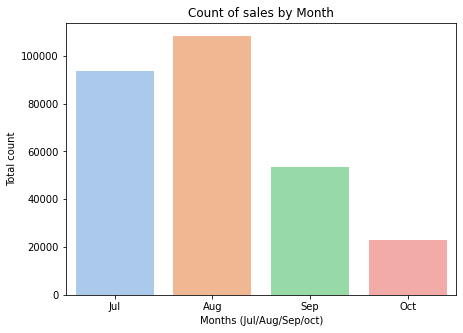

In [233]:
plt.figure(figsize=(7,5))
g = sns.countplot(spinneys_dataset_df.Month, palette="pastel")
plt.title("Count of sales by Month")
plt.xlabel("Months (Jul/Aug/Sep/oct)")
plt.ylabel("Total count")
plt.show()

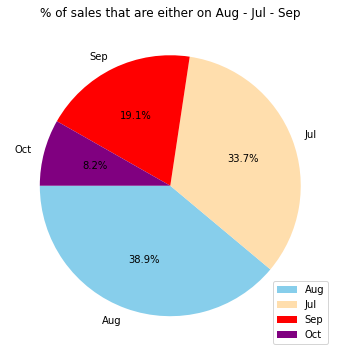

In [237]:
plt.figure(figsize=(12,6))
plt.title("% of sales that are either on Aug - Jul - Sep")
g = plt.pie(spinneys_dataset_df.Month.value_counts(), labels=spinneys_dataset_df.Month.value_counts().index, colors=['skyblue','navajowhite','red','purple'],autopct='%1.1f%%',startangle=180);
plt.legend()
plt.show()

So there are 100% sales on August showing the majority. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


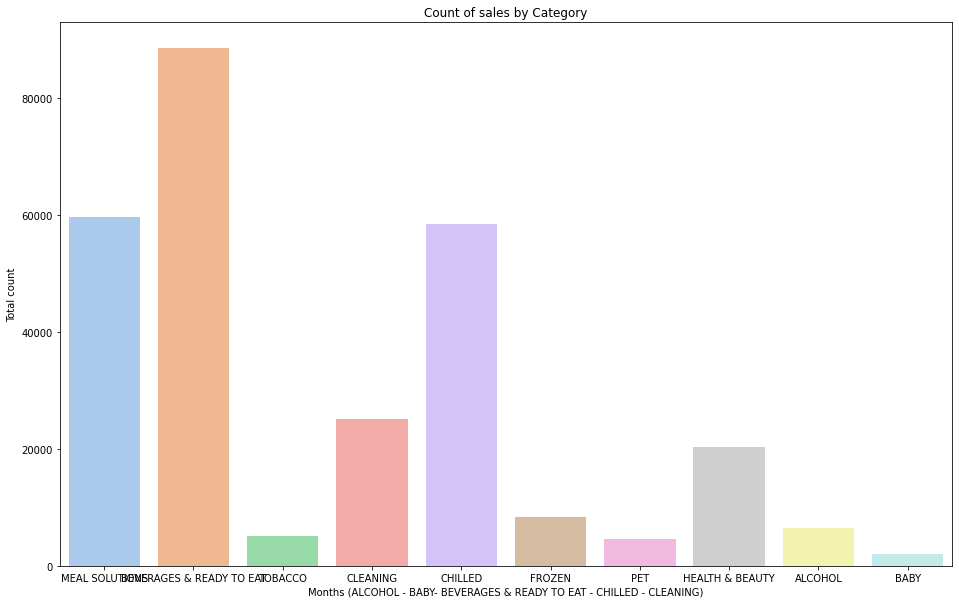

In [248]:
plt.figure(figsize=(16,10))
g = sns.countplot(spinneys_dataset_df.Category, palette="pastel")
plt.title("Count of sales by Category")
plt.xlabel("Months (ALCOHOL - BABY- BEVERAGES & READY TO EAT - CHILLED - CLEANING)")
plt.ylabel("Total count")
plt.show()